In [36]:
# Imporing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics

warnings.filterwarnings('ignore') # ignore warnings

# Preparing Setup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# set seaborn style
sns.set_style('whitegrid')

# setting randomness in notebook
np.random.seed(0)

## Data Loading

In [2]:
one_df = pd.read_csv(r'C:\Users\DEV\Downloads\technocolab_project\one.csv')
cluster_per_year_df = pd.read_csv(r'C:\Users\DEV\Downloads\technocolab_project\cluster_per_year_v1.csv')        

In [3]:
one_df.head()

,Year,PPP,Exchange,GDP,Country
0,1981,3.379142,8.658523,1.930000e+11,India
1,1982,3.429847,9.455132,2.010000e+11,India
2,1983,3.596462,10.098898,2.180000e+11,India
3,1984,3.732936,11.362583,2.120000e+11,India
4,1985,3.857350,12.368750,2.330000e+11,India


In [4]:
cluster_per_year_df.head()

,Unnamed: 0,Topic 1,Topic 2
0,1981,874,1126
1,1982,721,1289
2,1983,1107,903
3,1984,1033,977
4,1985,1011,988


In [5]:
cluster_per_year_df.rename(columns={'Unnamed: 0' : 'Year'}, inplace=True)

In [6]:
cluster_per_year_df.head()

,Year,Topic 1,Topic 2
0,1981,874,1126
1,1982,721,1289
2,1983,1107,903
3,1984,1033,977
4,1985,1011,988


In [7]:
# merging 2 dataframes : one_df + cluster_per_year_df

final_df = pd.merge(one_df, cluster_per_year_df, on='Year')
final_df.tail()

,Year,PPP,Exchange,GDP,Country,Topic 1,Topic 2
223,2018,103.706485,110.423179,4.950000e+12,Japan,1290,710
224,2018,1.178680,0.977883,7.050000e+11,Swz,1290,710
225,2018,1.198165,1.295818,1.720000e+12,Canada,1290,710
226,2018,4.227258,6.615957,1.390000e+13,China,1290,710
227,2018,0.683551,0.749532,2.860000e+12,UK,1290,710


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      228 non-null    int64  
 1   PPP       228 non-null    float64
 2   Exchange  228 non-null    float64
 3   GDP       228 non-null    float64
 4   Country   228 non-null    object 
 5   Topic 1   228 non-null    int64  
 6   Topic 2   228 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 14.2+ KB


In [9]:
final_df.isnull().sum()

Year        0
PPP         0
Exchange    0
GDP         0
Country     0
Topic 1     0
Topic 2     0
dtype: int64

### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder**

**Ordinal data** --> data are in order --> **LabelEncoder**

In [10]:
# setting one hot encoding for categorical column (Nominal Column: Country)
from sklearn.preprocessing import OneHotEncoder
One_Hot_Encoder = OneHotEncoder()

Country_df = pd.DataFrame(One_Hot_Encoder.fit_transform(final_df[['Country']]).toarray())
Country_df.columns = One_Hot_Encoder.get_feature_names(['Country'])

In [11]:
Country_df.head(10)     # 6 columns = 6 countries

,Country_Canada,Country_China,Country_India,Country_Japan,Country_Swz,Country_UK
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Concatenate dataframe --> final_df + Country_df
final_df = pd.concat([final_df, Country_df], axis = 1)

In [13]:
final_df.head()

,Year,PPP,Exchange,GDP,Country,Topic 1,Topic 2,Country_Canada,Country_China,Country_India,Country_Japan,Country_Swz,Country_UK
0,1981,3.379142,8.658523,1.930000e+11,India,874,1126,0.0,0.0,1.0,0.0,0.0,0.0
1,1981,228.831006,220.535833,1.220000e+12,Japan,874,1126,0.0,0.0,0.0,1.0,0.0,0.0
2,1981,1.892582,1.964242,1.090000e+11,Swz,874,1126,0.0,0.0,0.0,0.0,1.0,0.0
3,1981,1.134429,1.198903,3.060000e+11,Canada,874,1126,1.0,0.0,0.0,0.0,0.0,0.0
4,1981,1.408056,1.704542,1.960000e+11,China,874,1126,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
final_df.drop(["Country"], axis = 1, inplace = True)

In [15]:
final_df.tail()

,Year,PPP,Exchange,GDP,Topic 1,Topic 2,Country_Canada,Country_China,Country_India,Country_Japan,Country_Swz,Country_UK
223,2018,103.706485,110.423179,4.950000e+12,1290,710,0.0,0.0,0.0,1.0,0.0,0.0
224,2018,1.178680,0.977883,7.050000e+11,1290,710,0.0,0.0,0.0,0.0,1.0,0.0
225,2018,1.198165,1.295818,1.720000e+12,1290,710,1.0,0.0,0.0,0.0,0.0,0.0
226,2018,4.227258,6.615957,1.390000e+13,1290,710,0.0,1.0,0.0,0.0,0.0,0.0
227,2018,0.683551,0.749532,2.860000e+12,1290,710,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
final_df.shape

(228, 12)

In [17]:
# Converting values in 'Topic 1' & 'Topic 2'columns into proportion (such that, Topics_type1 + Topics_type2 = 1)
final_df['Topics_type1'] = final_df['Topic 1'] / (final_df['Topic 1'] + final_df['Topic 2'])
final_df['Topics_type2'] = final_df['Topic 2'] / (final_df['Topic 1'] + final_df['Topic 2'])

# droping columns: 'Topic 1' & 'Topic 2' from final_df.
final_df.drop(['Topic 1', 'Topic 2'], axis = 1, inplace = True)

In [18]:
final_df.tail()

,Year,PPP,Exchange,GDP,Country_Canada,Country_China,Country_India,Country_Japan,Country_Swz,Country_UK,Topics_type1,Topics_type2
223,2018,103.706485,110.423179,4.950000e+12,0.0,0.0,0.0,1.0,0.0,0.0,0.645,0.355
224,2018,1.178680,0.977883,7.050000e+11,0.0,0.0,0.0,0.0,1.0,0.0,0.645,0.355
225,2018,1.198165,1.295818,1.720000e+12,1.0,0.0,0.0,0.0,0.0,0.0,0.645,0.355
226,2018,4.227258,6.615957,1.390000e+13,0.0,1.0,0.0,0.0,0.0,0.0,0.645,0.355
227,2018,0.683551,0.749532,2.860000e+12,0.0,0.0,0.0,0.0,0.0,1.0,0.645,0.355


## Splitting Dataset final_df

In [19]:
print('Total num of years: {}'.format(2018-1981))

Total num of years: 37


In [20]:
training_df = final_df[final_df['Year'] < 2012].copy()
testing_df = final_df[final_df['Year'] > 2011].copy()

In [21]:
training_df.tail()

,Year,PPP,Exchange,GDP,Country_Canada,Country_China,Country_India,Country_Japan,Country_Swz,Country_UK,Topics_type1,Topics_type2
181,2011,107.454281,79.807020,6.160000e+12,0.0,0.0,0.0,1.0,0.0,0.0,0.653,0.347
182,2011,1.397498,0.888042,7.000000e+11,0.0,0.0,0.0,0.0,1.0,0.0,0.653,0.347
183,2011,1.239904,0.989258,1.790000e+12,1.0,0.0,0.0,0.0,0.0,0.0,0.653,0.347
184,2011,3.524468,6.461461,7.550000e+12,0.0,1.0,0.0,0.0,0.0,0.0,0.653,0.347
185,2011,0.706052,0.624141,2.660000e+12,0.0,0.0,0.0,0.0,0.0,1.0,0.653,0.347


In [22]:
testing_df.head()

,Year,PPP,Exchange,GDP,Country_Canada,Country_China,Country_India,Country_Japan,Country_Swz,Country_UK,Topics_type1,Topics_type2
186,2012,16.160835,53.437233,1.830000e+12,0.0,0.0,1.0,0.0,0.0,0.0,0.3805,0.6195
187,2012,104.273972,79.790455,6.200000e+12,0.0,0.0,0.0,1.0,0.0,0.0,0.3805,0.6195
188,2012,1.354072,0.937684,6.680000e+11,0.0,0.0,0.0,0.0,1.0,0.0,0.3805,0.6195
189,2012,1.244607,0.999365,1.830000e+12,1.0,0.0,0.0,0.0,0.0,0.0,0.3805,0.6195
190,2012,3.560968,6.312333,8.530000e+12,0.0,1.0,0.0,0.0,0.0,0.0,0.3805,0.6195


## Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in training_df.columns:
    training_df[col] = scaler.fit_transform(np.array(training_df[col]).reshape(-1, 1))
    
for col in testing_df.columns:
    testing_df[col] = scaler.fit_transform(np.array(testing_df[col]).reshape(-1, 1))

In [24]:
training_df.tail()

,Year,PPP,Exchange,GDP,Country_Canada,Country_China,Country_India,Country_Japan,Country_Swz,Country_UK,Topics_type1,Topics_type2
181,1.677051,1.230757,0.945663,3.016971,-0.447214,-0.447214,-0.447214,2.236068,-0.447214,-0.447214,1.704614,-1.704614
182,1.677051,-0.458110,-0.540636,-0.466184,-0.447214,-0.447214,-0.447214,-0.447214,2.236068,-0.447214,1.704614,-1.704614
183,1.677051,-0.460620,-0.538730,0.229172,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.447214,1.704614,-1.704614
184,1.677051,-0.424240,-0.435671,3.903708,-0.447214,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,1.704614,-1.704614
185,1.677051,-0.469121,-0.545606,0.784180,-0.447214,-0.447214,-0.447214,-0.447214,-0.447214,2.236068,1.704614,-1.704614


## Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods:

* heatmap

* feature_importance_

* SelectKBest

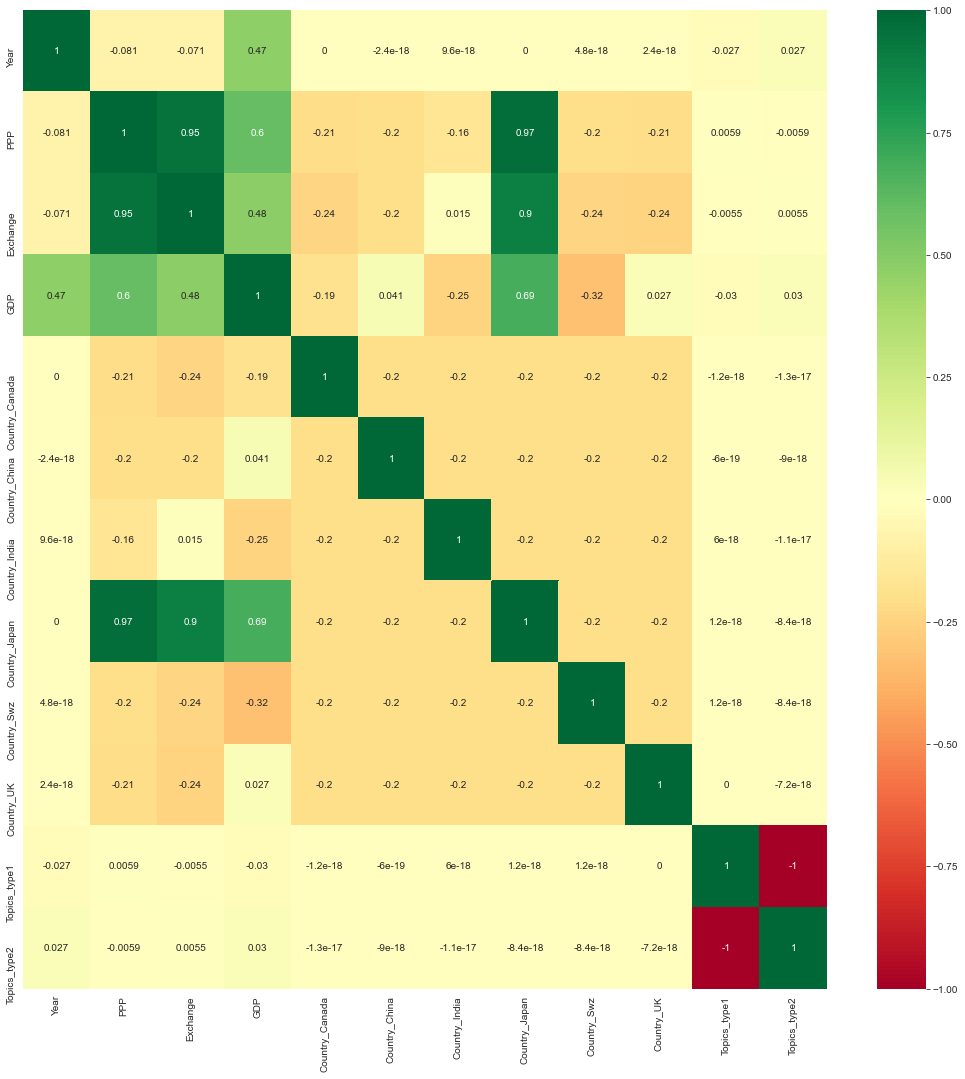

In [25]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(training_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

#### Important feature using ExtraTreesRegressor

In [26]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
x = training_df.drop("Exchange", axis=1)
y = training_df["Exchange"]
selection.fit(x, y)

ExtraTreesRegressor()

In [27]:
print(selection.feature_importances_)

[3.32851231e-02 1.67548774e-01 7.95311068e-02 3.92169755e-07
 7.22497486e-04 2.44779710e-02 6.91934815e-01 1.44137523e-05
 2.02967508e-05 1.10372307e-03 1.36088646e-03]


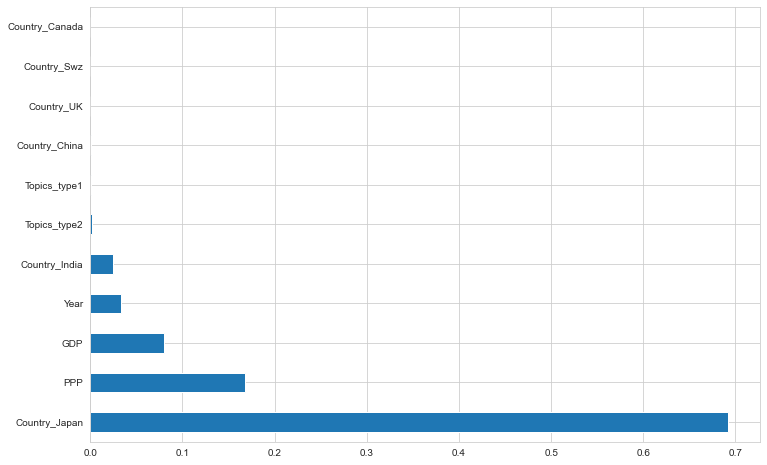

In [28]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#### Important feature using RandomForestRegressor

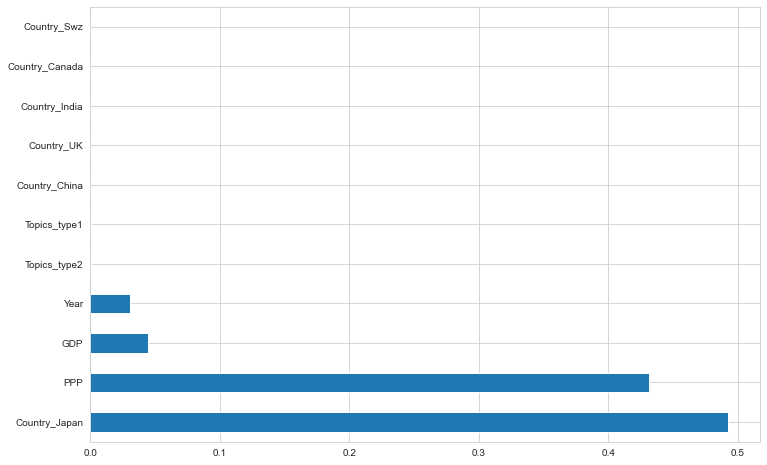

In [29]:
# Important feature using RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
selection = RandomForestRegressor()
x = training_df.drop("Exchange", axis=1)
y = training_df["Exchange"]
selection.fit(x, y)

#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Model: Training + Testing

In [30]:
x_train, y_train = training_df.drop("Exchange", axis=1), training_df["Exchange"]
x_test, y_test = testing_df.drop("Exchange", axis=1), testing_df["Exchange"]

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
! pip install xgboost
import xgboost as xgb

In [55]:
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score

In [56]:
regg_models = [LinearRegression(), Lasso(), Ridge(), SVR(),
               RandomForestRegressor(), DecisionTreeRegressor(), xgb.XGBRegressor()]

#### Models evaluation on training data

In [57]:
mean=[]
std=[]
for i in regg_models:
    cvs=cross_val_score(i,x,y,cv=5,scoring=make_scorer(r2_score))
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))

In [63]:
print('________________Cross Validation Score________________ \n')
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',mean[i])

________________Cross Validation Score________________ 

LinearRegression : 0.6640385812463393
Lasso : 0.026970700146981753
Ridge : 0.7172664273592568
SVR : 0.9013158730126692
RandomForestRegressor : 0.9506983321278335
DecisionTreeRegressor : 0.9451606224564142
XGBRegressor : 0.9519133989817572


#### Models evaluation on testing data

In [66]:
r2_score = []
RMSE = []
for i in regg_models:    
    train_model = i.fit(x_train, y_train)
    y_pred = train_model.predict(x_test)
    score = train_model.score(x_test, y_test)
    r2_score.append(score)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)

print("                                         Training Data \n","="*100)
print("           r2_score \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',r2_score[i])
    
print('-'*60,'\n')

print("            RMSE \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',r2_score[i])

                                         Training Data 
           r2_score 

LinearRegression : 0.8799345615136804
Lasso : 0.0
Ridge : 0.8744176297974839
SVR : 0.8535450213865406
RandomForestRegressor : 0.8717244568707235
DecisionTreeRegressor : 0.825035266782586
XGBRegressor : 0.7472580600602068
------------------------------------------------------------ 

            RMSE 

LinearRegression : 0.8799345615136804
Lasso : 0.0
Ridge : 0.8744176297974839
SVR : 0.8535450213865406
RandomForestRegressor : 0.8717244568707235
DecisionTreeRegressor : 0.825035266782586
XGBRegressor : 0.7472580600602068


In [67]:
r2_score = []
RMSE = []
for i in regg_models:    
    train_model = i.fit(x_train, y_train)
    y_pred = train_model.predict(x_train)
    score = train_model.score(x_train, y_train)
    r2_score.append(score)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)

print("                                         Testing Data \n","="*100)    
print("           r2_score \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',r2_score[i])
    
print('-'*60,'\n')

print("            RMSE \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',r2_score[i])

                                         Testing Data 
           r2_score 

LinearRegression : 0.9494330358136744
Lasso : 0.0
Ridge : 0.9488284008455354
SVR : 0.9482860481459322
RandomForestRegressor : 0.9989153794329931
DecisionTreeRegressor : 1.0
XGBRegressor : 0.9999990510551046
------------------------------------------------------------ 

            RMSE 

LinearRegression : 0.9494330358136744
Lasso : 0.0
Ridge : 0.9488284008455354
SVR : 0.9482860481459322
RandomForestRegressor : 0.9989153794329931
DecisionTreeRegressor : 1.0
XGBRegressor : 0.9999990510551046
